<a href="https://colab.research.google.com/github/rukendar/Rukendar.s/blob/main/Multi_Linear_Regression_3_01_25.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   HP      81 non-null     int64  
 1   MPG     81 non-null     float64
 2   VOL     81 non-null     int64  
 3   SP      81 non-null     float64
 4   WT      81 non-null     float64
dtypes: float64(3), int64(2)
memory usage: 3.3 KB


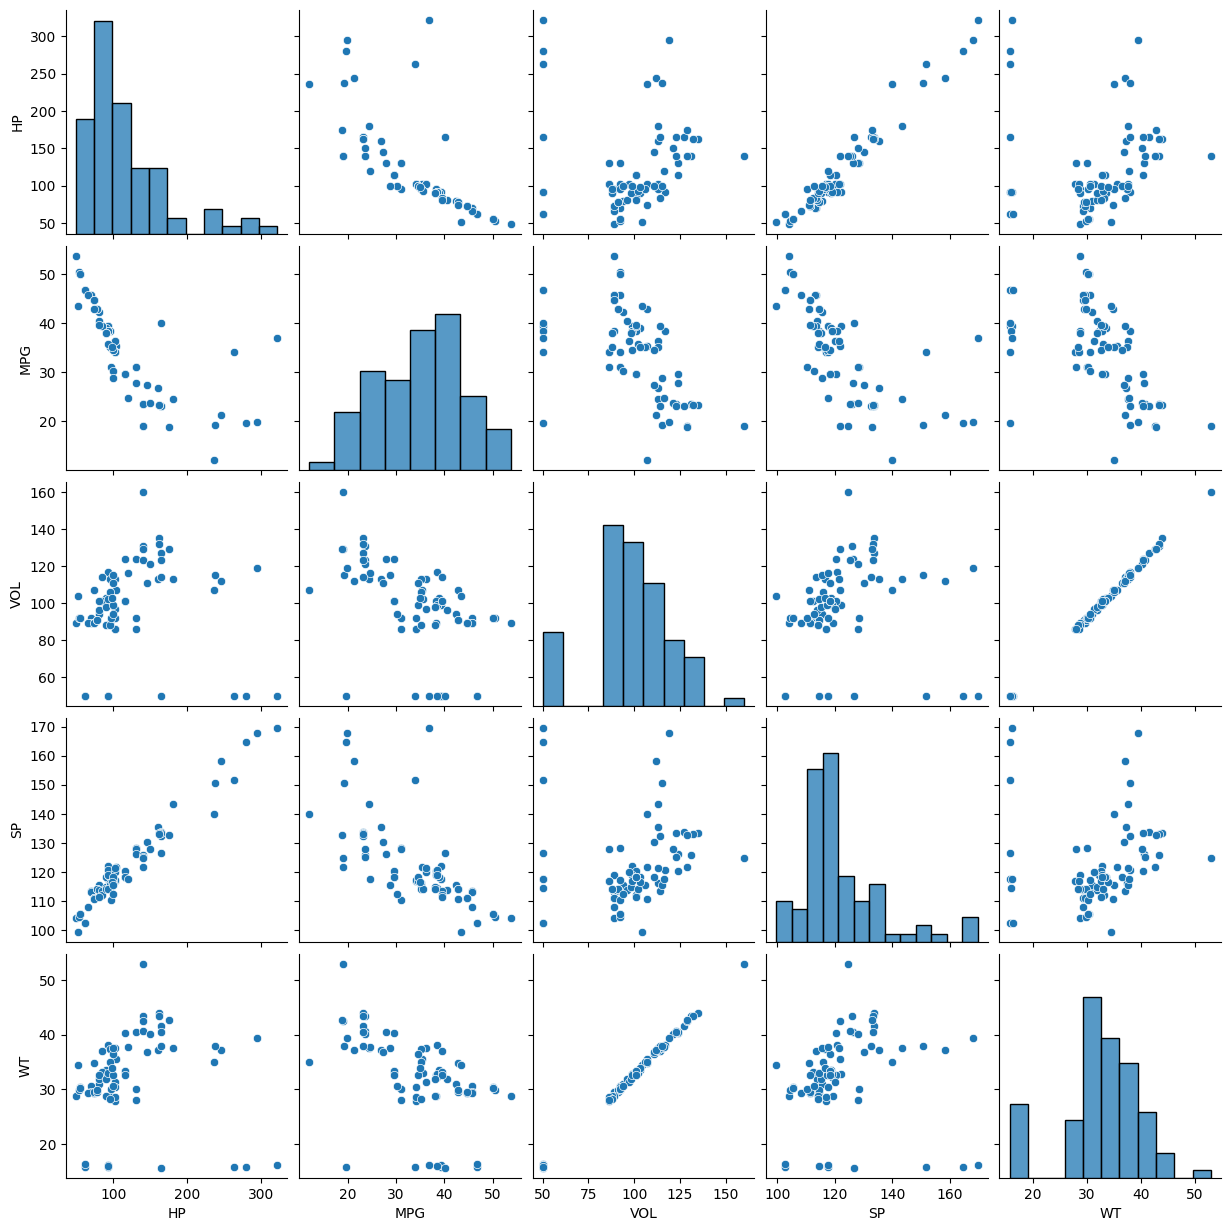

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf

file_path = '/content/drive/MyDrive/Cars.csv'
df = pd.read_csv(file_path)
df.head()
df.shape
df.info()
df.describe()
df.isnull().sum()
df.corr()
sns.pairplot(df)
plt.show()

In [4]:
import statsmodels.formula.api as smf
model = smf.ols('MPG~WT+VOL+SP+HP',data=df).fit()
model.params

,0
Intercept,30.677336
WT,0.400574
VOL,-0.336051
SP,0.395627
HP,-0.205444


In [5]:
print(model.tvalues,"\n",model.pvalues)


Intercept    2.058841
WT           0.236541
VOL         -0.590970
SP           2.499880
HP          -5.238735
dtype: float64 
 Intercept    0.042936
WT           0.813649
VOL          0.556294
SP           0.014579
HP           0.000001
dtype: float64


In [6]:
(model.rsquared,model.rsquared_adj)

(0.7705372737359842, 0.7584602881431413)

In [7]:
ml_v = smf.ols('MPG~VOL',data = df).fit()
print(ml_v.tvalues,"\n" , ml_v.pvalues)

Intercept    14.106056
VOL          -5.541400
dtype: float64 
 Intercept    2.753815e-23
VOL          3.822819e-07
dtype: float64


In [8]:
ml_v = smf.ols('MPG~WT',data = df).fit()
print(ml_v.tvalues,"\n" , ml_v.pvalues)

Intercept    14.248923
WT           -5.508067
dtype: float64 
 Intercept    1.550788e-23
WT           4.383467e-07
dtype: float64


In [9]:
ml_vw = smf.ols('MPG~VOL+WT',data = df).fit()
print(ml_vw.tvalues,"\n" , ml_vw.pvalues)

Intercept    12.545736
VOL          -0.709604
WT            0.489876
dtype: float64 
 Intercept    2.141975e-20
VOL          4.800657e-01
WT           6.255966e-01
dtype: float64


In [10]:
(ml_vw.rsquared,ml_vw.rsquared_adj)

(0.282109561644598, 0.2637021145072801)

In [11]:
rsq_hp = smf.ols('HP~WT+VOL+SP',data=df).fit().rsquared
vif_hp = 1/(1-rsq_hp)

rsq_wt = smf.ols('WT~HP+VOL+SP',data=df).fit().rsquared
vif_wt = 1/(1-rsq_wt)

rsq_vol = smf.ols('VOL~WT+SP+HP',data=df).fit().rsquared
vif_vol = 1/(1-rsq_vol)

rsq_sp = smf.ols('SP~WT+VOL+HP',data=df).fit().rsquared
vif_sp = 1/(1-rsq_sp)

d1 = {'Variables':['HP','WT','VOL','SP'],'VIF':[vif_hp,vif_wt,vif_vol,vif_sp]}
Vif_frame = pd.DataFrame(d1)
Vif_frame

,Variables,VIF
0,HP,19.926589
1,WT,639.533818
2,VOL,638.806084
3,SP,20.007639


from matplotlib import pyplot as plt
Vif_frame['VIF'].plot(kind='hist', bins=20, title='VIF')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
Vif_frame.groupby('Variables').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
Vif_frame['VIF'].plot(kind='line', figsize=(8, 4), title='VIF')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(Vif_frame['Variables'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(Vif_frame, x='VIF', y='Variables', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

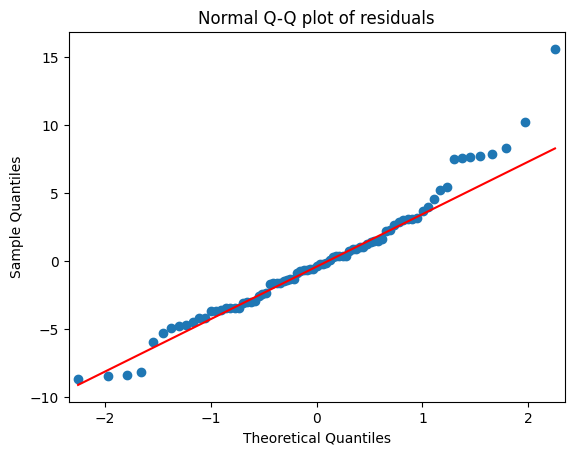

In [12]:
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()

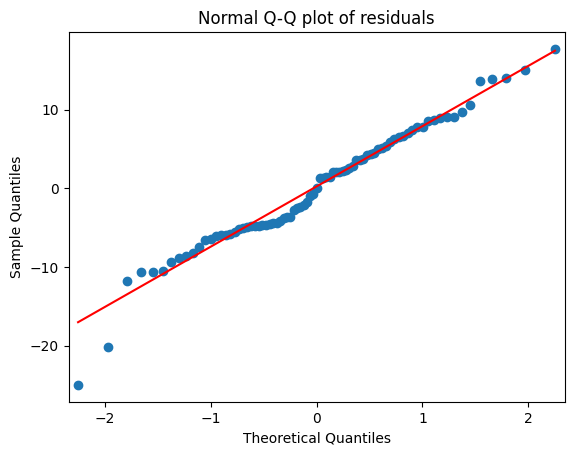

In [13]:
import statsmodels.api as sm
qqplot=sm.qqplot(ml_vw.resid,line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()

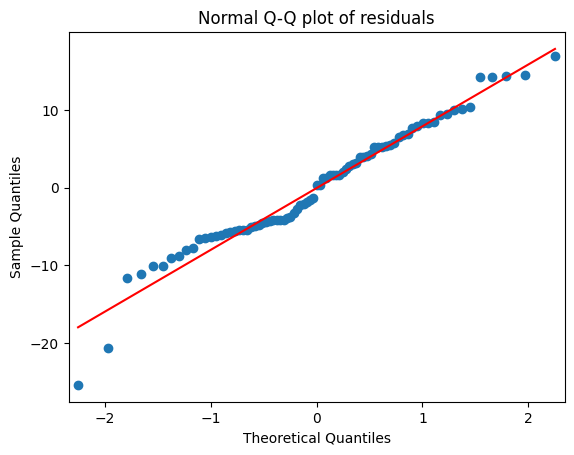

In [14]:
import statsmodels.api as sm
qqplot=sm.qqplot(ml_v.resid,line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()